In [ ]:
# NIAID: Image convolution demo
# Pradip, Shrestha


## Convolution
A mathematical operation on two functions (f and g) that produces a third function \(f*g\) that expresses how the shape of one is modified by the other. 

Mathematically
![Convolution Integral Formula](./conv-math-formula.svg)

Animation of convolution in action
![Convolution Animation](./conv-animation.gif)

In [2]:
# See image filter = https://www.analyticsvidhya.com/blog/2021/08/sharpening-an-image-using-opencv-library-in-python/
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import cv2

## Discrete Convolution


In [3]:
a = [1, 2, 3]
b = [2, 3, 4]

# Manual process flip b and perform multiplication + addition
#       1, 2, 3
# 4, 3, 2               -> 2

#       1, 2, 3
#    4, 3, 2            -> 2, 1*3 + 2*2 = 2, 7

#       1, 2, 3
#       4, 3, 2         -> 2, 7, 16

#       1, 2, 3
#          4, 3, 2      -> 2, 7, 16, 17


#       1, 2, 3
#             4, 3, 2   -> 2, 7, 16, 17, 12



convolution = np.convolve(a, b)
convolution

# Used in calculating moving average smooth chart

array([ 2,  7, 16, 17, 12])

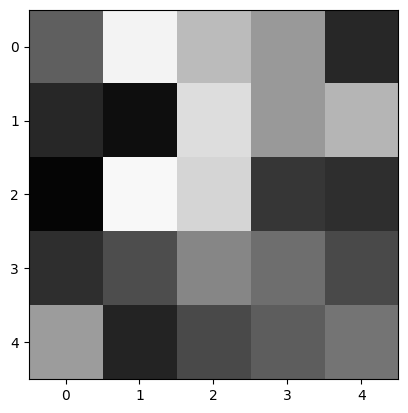

In [31]:
# Display matrix as image
np.random.seed(42)
np_arr =  np.random.rand(5, 5) * 255
plt.imshow(np_arr, cmap='gray', vmin=0, vmax=255)

Image convolution visual representation in matrix form

![Matrix algebra](./image-conv-process.webp)

In [5]:
img= Image.open('./thor.jpeg')
np_img = np.array(img)
print(np_img.shape)
np_img = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)

(274, 184, 3)


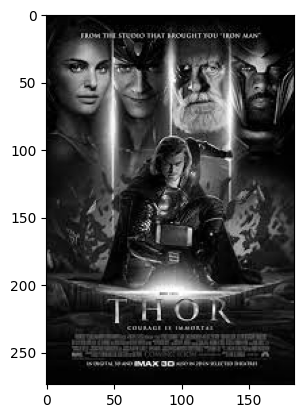

In [6]:
# display image
# for simplicity making it grayscale
# each pixel has value from 0 to 255. 0:black, 255: white
#plt.figure(figsize=(13, 13))
plt.imshow(np_img, cmap='gray')

In [7]:
np_img[75][50] # test

228

In [16]:
def convolve(image, kernel, size=3):
    # Adding 0 to all sides to fit the convolution 3x3
    image_padded = np.zeros((image.shape[0] + size-1, image.shape[1] + size-1))
    image_padded[size-2:-1, size-2:-1] = image
    
    # convolution output
    output = np.zeros_like(image_padded)
    
    # flipping kernel vertically and horizontally
    kernel = np.flipud(np.fliplr(kernel))
    # Loop over every pixel of the image
    # stride = 1
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # element-wise multiplication of the kernel and the image, matrix dot product
            output[i, j] = (kernel * image_padded[i: i + size, j: j + size]).sum()

    return output

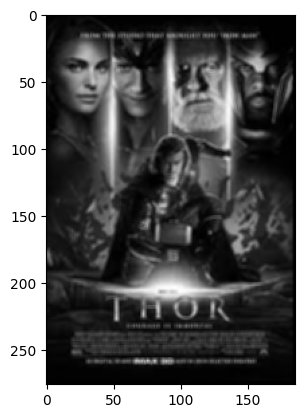

In [19]:
gaus_kernel = np.multiply(np.array(
                          [[1, 2, 1],
                           [2, 4, 2],
                           [1, 2, 1]]), 1/16) # sum of all element of matrix = 16
box_kernel = np.multiply(np.array(
                          [[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]]), 1/9) # sum of all element of matrix = 9
copied_np_img = np_img
for i in range(1):
    copied_np_img = convolve(copied_np_img, box_kernel)

plt.imshow(copied_np_img, cmap='gray', vmin=0, vmax=255)

Gaussian Filter for 2D
![Gaussian Formula](./2d-gauss.jpg)

In [13]:
import math
def get_gauss_kernel(size=3,sigma=1):
    center = (int)(size/2)
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            diff =-((i-center)**2+(j-center)**2) 
            kernel[i,j] = np.exp(diff/(2*sigma**2))/(2*math.pi*sigma**2)
    return kernel/np.sum(kernel) # normalization

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


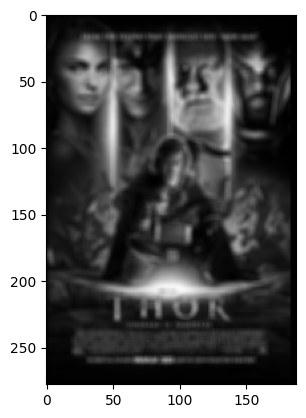

In [30]:
# Calculate kernel based on the size and sigma
size = 5
sigma = 3

gaus_kernel = get_gauss_kernel(size, sigma) # calculated using formula
print(gaus_kernel)

# apply gauss
copied_np_img = np_img
for i in range(1):
    copied_np_img = convolve(copied_np_img, gaus_kernel, size)

plt.imshow(copied_np_img, cmap='gray', vmin=0, vmax=255)

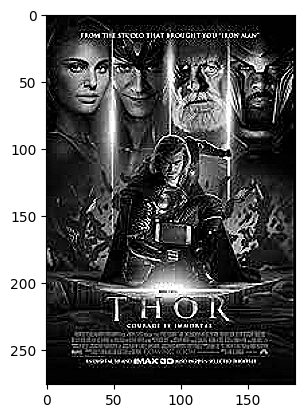

In [26]:
sharp_kernel = np.array(
                  [[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # sum of all element of matrix = 1
copied_np_img = np_img
for i in range(1):
    copied_np_img = convolve(copied_np_img, sharp_kernel)

plt.imshow(copied_np_img, cmap='gray', vmin=0, vmax=255)

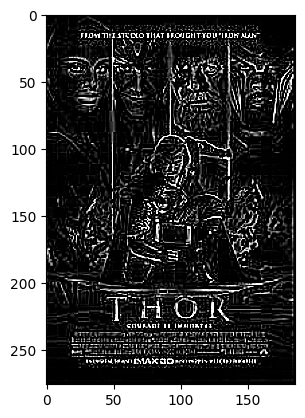

In [27]:
edge_kernel = np.array([[-1, -1, -1], 
                       [-1, 8, -1],
                       [-1, -1, -1]]) 
copied_np_img = np_img
for i in range(1):
    copied_np_img = convolve(copied_np_img, edge_kernel)

plt.imshow(copied_np_img, cmap='gray', vmin=0, vmax=255)